# Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to \"call\" them specifically.

%matplotlib inline

In [3]:
#Import Data
path = r'C:\Users\Samantha Ramos\Desktop\Restaurant Rating Analysis'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'inspections_vis.csv'), index_col = False)

In [5]:
df.shape

(84740, 19)

In [6]:
df.head()

,Unnamed: 0,NAME,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,NEW GRADE,CUISINE
0,0,CROWN FRIED CHICKEN,Brooklyn,11216.0,Chicken,1/3/2023,Violations were cited in the following area(s).,10B,Anti-siphonage or back-flow prevention device ...,Not Critical,29.0,C,2023-01-03,2/5/2024,Cycle Inspection / Re-inspection,40.670640,-73.950440,C,American
1,1,BAGEL BOB,Brooklyn,11234.0,Bagels/Pretzels,1/3/2023,Violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,Not Critical,26.0,NaN,NaN,2/5/2024,Pre-permit (Operational) / Initial Inspection,40.618342,-73.932203,B,American
2,2,MIZNON,Manhattan,10011.0,Mediterranean,1/3/2023,Violations were cited in the following area(s).,10B,Anti-siphonage or back-flow prevention device ...,Not Critical,12.0,A,2023-01-03,2/5/2024,Cycle Inspection / Re-inspection,40.741869,-74.004713,A,European
3,3,I AM KIMCHI,Queens,11358.0,Korean,1/3/2023,Violations were cited in the following area(s).,05D,No hand washing facility in or adjacent to toi...,Critical,26.0,NaN,NaN,2/5/2024,Pre-permit (Operational) / Initial Inspection,40.755734,-73.804625,B,Asian
4,4,THE MONKEY ROOM,Manhattan,10033.0,American,1/3/2023,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,Not Critical,9.0,A,2023-01-03,2/5/2024,Cycle Inspection / Initial Inspection,40.854623,-73.937051,A,American


# The Elbow Technique

In [7]:
df_k = df[['SCORE', 'ZIPCODE']]

In [8]:
df_k.isnull().sum()

SCORE      3949
ZIPCODE       0
dtype: int64

In [9]:
df_k = df_k[df_k['SCORE'].isnull()==False]

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [11]:
score = [kmeans[i].fit(df_k).score(df_k) for i in range(len(kmeans))] # Creates a score that represents
# a rate of variation for the given cluster option.
score

C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

[-28435101329.74416,
 -1718815750.702989,
 -535187412.26050293,
 -191333643.37013426,
 -136211086.5681052,
 -90163213.21820787,
 -57071168.985205136,
 -46962451.66359635,
 -37396478.79714506]

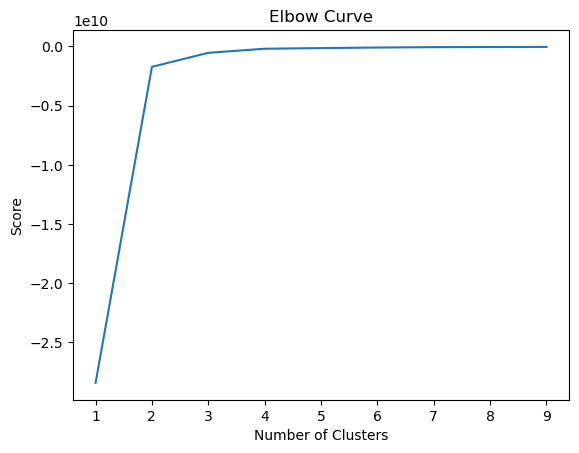

In [12]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# K-means Clustering

In [13]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 2)

In [14]:
# Fit the k-means object to the data.
kmeans.fit(df_k)

C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [15]:
df_k['clusters'] = kmeans.fit_predict(df_k)

C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
df_k.head()

,SCORE,ZIPCODE,clusters
0,29.0,11216.0,0
1,26.0,11234.0,0
2,12.0,10011.0,1
3,26.0,11358.0,0
4,9.0,10033.0,1


In [17]:
df_k['clusters'].value_counts()

clusters
0    40854
1    39937
Name: count, dtype: int64

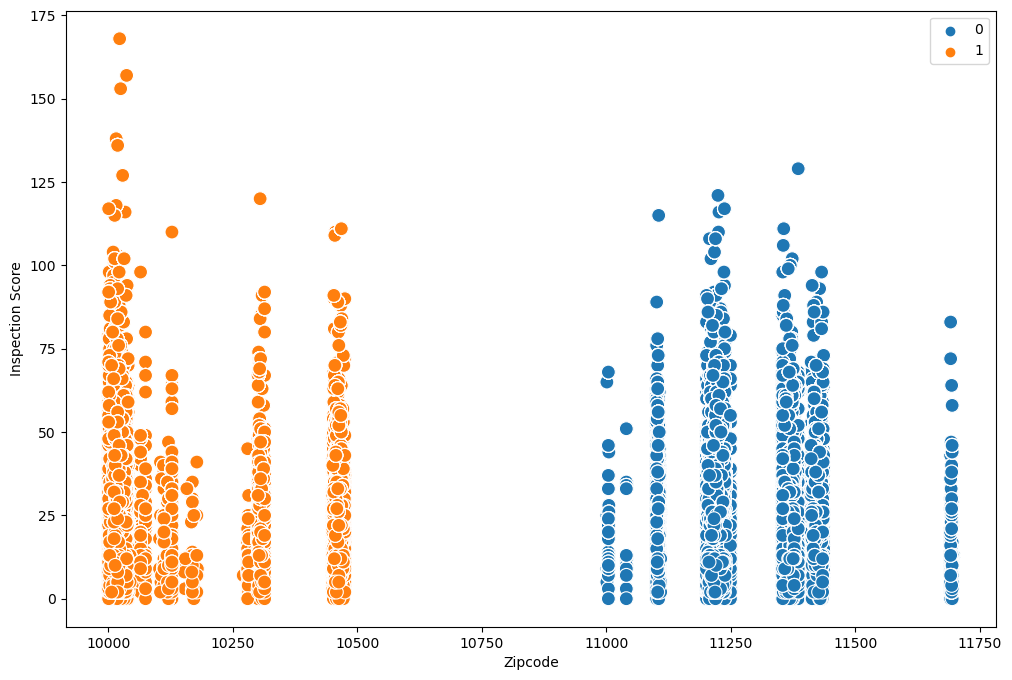

In [18]:
# Plot the clusters for the \"Price per Unit\" and \"D.metro\" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['ZIPCODE'], y=df_k['SCORE'], hue=kmeans.labels_, s=100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Zipcode') # Label x-axis.
plt.ylabel('Inspection Score') # Label y-axis.
plt.show()

### The clusters make sense because there is a gap in the zipcodes between 10500 and 11000 so the algorithm created 2 clusters to account for zip codes less than 10500 and greater than 11000.

In [21]:
df_k.loc[df_k['clusters'] == 1, 'cluster'] = 'orange'
df_k.loc[df_k['clusters'] == 0, 'cluster'] = 'blue'

In [22]:
df_k.groupby('cluster').agg({'ZIPCODE':['mean', 'median'], 
                         'SCORE':['mean', 'median']})

ZIPCODE               SCORE       
                 mean   median       mean median
cluster                                         
blue     11273.951363  11230.0  26.274637   22.0
orange   10123.776097  10022.0  24.538223   21.0

### While there are higher points in the orange cluster, the mean and median of the blue cluster is actually higher than the orange. It seems like those points above 125 in the orange cluster could be treated as outliers.

### These findings are not very useful because there were not any meaningful groupings between scores.